# Introduction to Handling Imbalanced Data in Machine Learning

Imbalanced datasets are those where the classes are not represented equally.
For instance, in a binary classification problem, one class might have significantly more instances than the other.
This imbalance can lead to biased models that perform poorly on the minority class.

Two common techniques to address class imbalance are oversampling and undersampling.
This notebook will provide an introduction to these techniques, along with examples of how to implement them using Python.

## Oversampling

Oversampling involves increasing the number of instances in the minority class. This can be done by duplicating existing instances or generating new instances synthetically. One popular method for synthetic generation is [SMOTE](https://towardsdatascience.com/smote-fdce2f605729) (Synthetic Minority Over-sampling Technique). SMOTE adds noise to the data so newly created synthetic observations are not exact replicates. [RandomOverSampler](https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.RandomOverSampler.html) is a method that identifies and replicates items in the minority class. It does not add any noise.

### Example of Oversampling using SMOTE & RandomOverSampler

In [ ]:
# Import libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from collections import Counter

Original class distribution: Counter({1: 50, 0: 10})


Text(0.5, 0, 'Sepal Width (cm)')

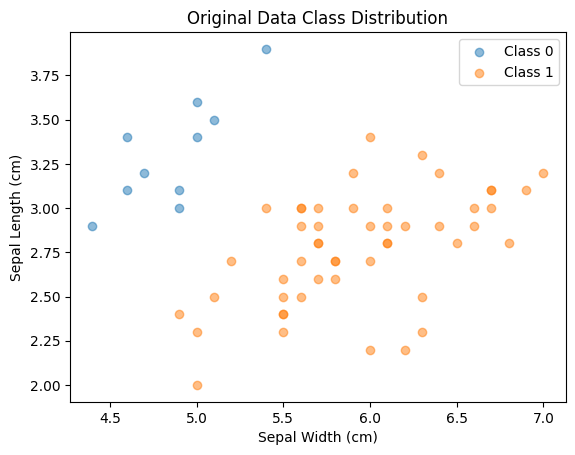

In [ ]:
# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create an imbalance in the dataset by removing class 2, reducing class 0 and 1
X_imbalanced = X[y != 0][:50]
y_imbalanced = y[y != 0][:50]

X_imbalanced = pd.concat([pd.DataFrame(X_imbalanced), pd.DataFrame(X[y == 0][:10])], axis=0).values
y_imbalanced = pd.concat([pd.Series(y_imbalanced), pd.Series(y[y == 0][:10])], axis=0).values

# Display the subsampled class distribution
print('Original class distribution:', Counter(y_imbalanced))

# Plot the resampled dataset
plt.scatter(X_imbalanced[y_imbalanced == 0][:, 0], X_imbalanced[y_imbalanced == 0][:, 1], label="Class 0", alpha=0.5)
plt.scatter(X_imbalanced[y_imbalanced == 1][:, 0], X_imbalanced[y_imbalanced == 1][:, 1], label="Class 1", alpha=0.5)

plt.legend()
plt.title('Original Data Class Distribution')
plt.ylabel('Sepal Length (cm)')
plt.xlabel('Sepal Width (cm)')


SMOTE Resampled class distribution: Counter({1: 50, 0: 50})
RandomOverSampler Resampled class distribution: Counter({1: 50, 0: 50})


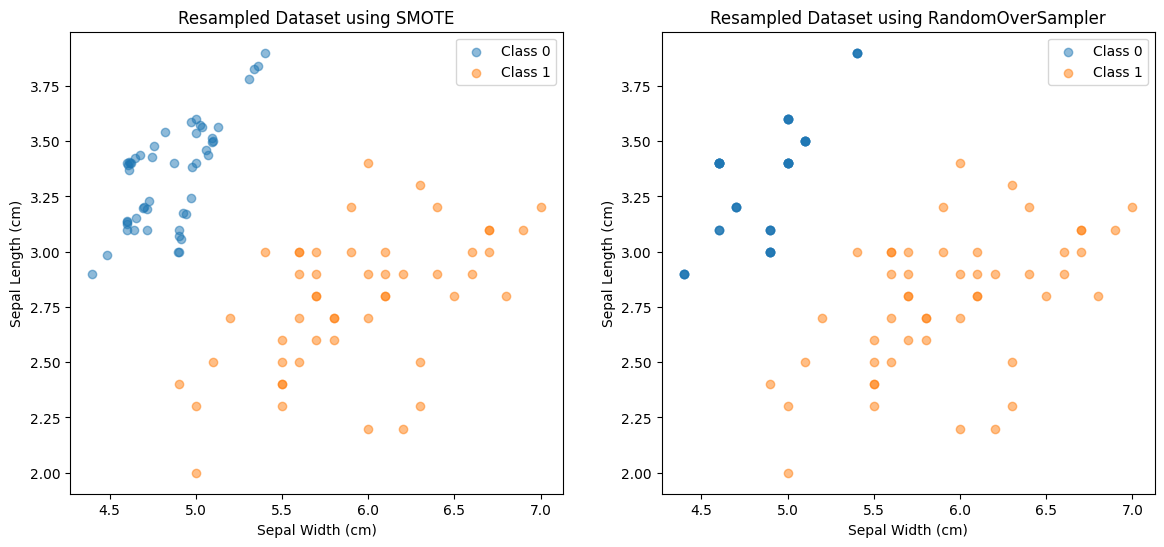

In [ ]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=2024)
X_smo, y_smo = smote.fit_resample(X_imbalanced, y_imbalanced)

ros = RandomOverSampler(random_state=2024)
X_res, y_res = ros.fit_resample(X_imbalanced, y_imbalanced)

# Display the resampled class distributions
print('SMOTE Resampled class distribution:', Counter(y_res))
print('RandomOverSampler Resampled class distribution:', Counter(y_res))

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the original imbalanced data
ax[0].scatter(X_smo[y_smo == 0][:, 0], X_smo[y_smo == 0][:, 1], label="Class 0", alpha=0.5)
ax[0].scatter(X_smo[y_smo == 1][:, 0], X_smo[y_smo == 1][:, 1], label="Class 1", alpha=0.5)
ax[0].legend()
ax[0].set_title('Resampled Dataset using SMOTE')
ax[0].set_ylabel('Sepal Length (cm)')
ax[0].set_xlabel('Sepal Width (cm)')

# Plot the resampled data using SMOTE
ax[1].scatter(X_res[y_res == 0][:, 0], X_res[y_res == 0][:, 1], label="Class 0", alpha=0.5)
ax[1].scatter(X_res[y_res == 1][:, 0], X_res[y_res == 1][:, 1], label="Class 1", alpha=0.5)
ax[1].legend()
ax[1].set_title('Resampled Dataset using RandomOverSampler')
ax[1].set_ylabel('Sepal Length (cm)')
ax[1].set_xlabel('Sepal Width (cm)')
plt.show()

Both oversampling techniques resulted in the creation of 40 "Class 0" flowers in this example. The SMOTE is more representative of real world data as there is added variance to the data, which is not captured in the RandomOverSampler. Both methods will increase the bias of the data and can lead to overfitting, but in this example SMOTE is less extreme at creating this overfitting bias.

## Undersampling

Undersampling involves reducing the number of instances in the majority class. This can be done by randomly selecting a smaller subset of the majority class. Undersampling may result in loss of important information from the majority class resulting in errors.

### Example of Undersampling using Random Under-Sampling

Resampled dataset shape: Counter({0: 10, 1: 10})


Text(0.5, 0, 'Sepal Width (cm)')

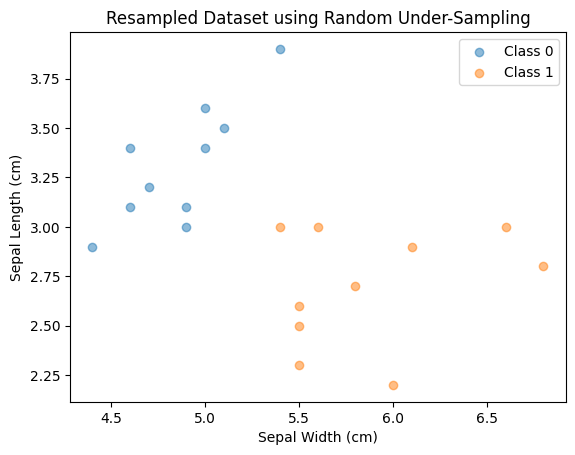

In [ ]:
# Apply Random Under-Sampling
rus = RandomUnderSampler(random_state=2024)
X_res, y_res = rus.fit_resample(X_imbalanced, y_imbalanced)

# Display the class distribution
print('Resampled dataset shape:', Counter(y_res))
# Plot the resampled dataset
plt.scatter(X_res[y_res == 0][:, 0], X_res[y_res == 0][:, 1], label="Class 0", alpha=0.5)
plt.scatter(X_res[y_res == 1][:, 0], X_res[y_res == 1][:, 1], label="Class 1", alpha=0.5)
plt.legend()
plt.title('Resampled Dataset using Random Under-Sampling')
plt.ylabel('Sepal Length (cm)')
plt.xlabel('Sepal Width (cm)')

## Conclusions

Oversampling and undersampling are two effective techniques to handle imbalances in classes of a dataset. The python package [Imbalanced-learn](https://imbalanced-learn.org/stable/) can perform all the oversampling and undersampling techniques demostrated in this workflow. Oversampling can generate new samples to improve models, but at the cost of increased bias. Undersampling will reduce the amount of the majority class, but will reduce the variance in the data and the ability of models to seperate the classes. This is an example of the [Bias-Variance Tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

In [ ]:
## End of Script